### Imports

In [1]:
import numpy as np
import matplotlib

from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### Dataset Load

- In 1936 Ronald Fisher published a famous paper on classification titled “The use of multiple measurements in taxonomic problems.” In the paper, Fisher study the problem of classifying iris flowers based on measurements of the sepal and petal widths and lengths, depicted in the image below.

In [2]:
iris = datasets.load_iris()
X = iris.data[:, :4]
y = iris.target
print("Train data", X.shape)
print(" Training label", y.shape)

Train data (150, 4)
 Training label (150,)


In [3]:
setosa = X[:50,:]
versacolor = X[50:100,:]
virginica = X[100:150,:]

### Least Squares Formulation

- Training Data: Sepal length, Sepal width
- Labels: 0 (setosa), 1 (versacolor), 2 (virginica)

In [4]:
def lstsq(A, b):
    if np.linalg.matrix_rank(A) == 2:
        return np.linalg.inv(A.transpose().dot(A)).dot(A.transpose()).dot(b).T# (A^T*A)^-1 * A^T * b
    return np.linalg.inv(A.transpose().dot(A)).dot(A.transpose()).dot(b)# (A^T*A)^-1 * A^T * b

w = lstsq(X, y)

### Cross Validation
- Write a Matlab or Python program to “train” a classifier using LS based on 40 labeled examples of each of the three flower types, and then test the performance of your classifier using the remaining 10 examples from each type, or 30 total test examples. Repeat this with many different randomly chosen subsets of training and test. What is the average test error (number of mistakes divided by 30)?

In [5]:
def cross_validation(X, y, split, num_samples):
    error_rate = []
    for i in range(0, num_samples):
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = split, test_size=1-split)
        w_temp = lstsq(X_train, y_train)
    
        # test error rate
        new_predictions =  [0 if i < .5 else 1 if i < 1.5 else 2 for i in X_test.dot(w_temp)]
        error_rate.append(1-sum([1 if i == True else 0 for i in (np.array(y_test).ravel() == new_predictions)]) /
                          len(y_test))
    return sum(error_rate)/len(error_rate)


def pretty_print_cv(X, y, split, num_samples):
    result = cross_validation(X, y, split, num_samples)
    print("for,", str(num_samples), "tests with a train test split of",str(100*split), str(100*round((1.0-split), 2)),
          "\n", " we see an average error rate of:", result)

num_samples = 1000
split = .8
pretty_print_cv(X, y, split, num_samples)

for, 1000 tests with a train test split of 80.0 20.0 
  we see an average error rate of: 0.03816666666666687


### Cross Validation Analysis

- Experiment with even smaller sized training sets. Clearly we need at least one training example from each type of flower. Make a plot of average test error as a function of training set size.

In [6]:
num_samples = 1000
num_points = 30
points = np.linspace(.1,.9, num_points)
vals = [cross_validation(X, y, step, num_samples) for step in np.linspace(.1,.9, num_points)]

Text(0,0.5,'average error')

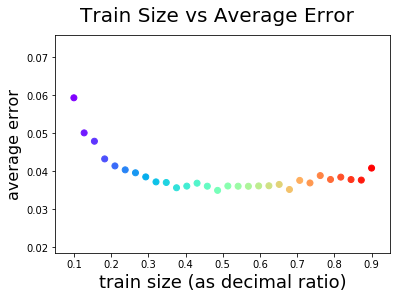

In [7]:
fig = plt.figure()
colors = matplotlib.cm.rainbow(np.linspace(0, 1, num_points))
plt.scatter(points, vals, color = colors)

fig.suptitle('Train Size vs Average Error', fontsize=20)
plt.xlabel('train size (as decimal ratio)', fontsize=18)
plt.ylabel('average error', fontsize=16)

### Feature Reduction Analysis
- Now design a classifier using only the first three measurements (sepal length, sepal width, and petal length). What is the average test error in this case?

In [8]:
X_temp = iris.data[:, :3]
y = iris.target

In [9]:
num_samples = 1000
num_points = 30
points = np.linspace(.1,.9, num_points)
vals = [cross_validation(X_temp, y, step, num_samples) for step in np.linspace(.1,.9, num_points)]

Text(0,0.5,'average error')

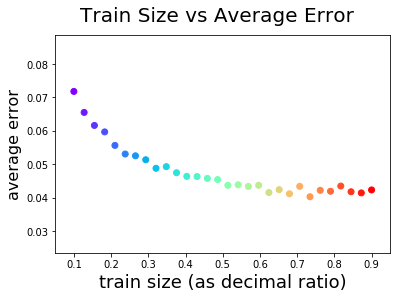

In [10]:
fig = plt.figure()
colors = matplotlib.cm.rainbow(np.linspace(0, 1, num_points))
plt.scatter(points, vals, color = colors)

fig.suptitle('Train Size vs Average Error', fontsize=20)
plt.xlabel('train size (as decimal ratio)', fontsize=18)
plt.ylabel('average error', fontsize=16)

### Reduced Feature Analysis

- Use a 3d scatter plot to visualize the measurements in (d). Does it appear that the data lies approximately in a 2-dimensional subspace? You can do this by rotating the plot and looking for a plane that approximately contains the data points.

- As we can see below the data lies beyond a 2D subspace

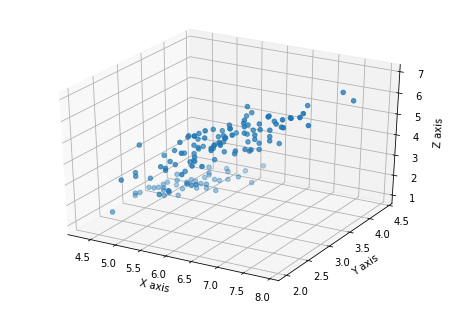

In [11]:
fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(X[:, 0], X[:, 1], X[:, 2])
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

plt.show()

### SVD Applications
- Now we find the subspace containing the majority of the data. Use SVD of the first three features to find the best rank-2 approximation to the 150 by 3 data matrix. Which components of the SVD span the 2-dimensional subspace (approximately) containing the data?

In [28]:
u, s, v = np.linalg.svd(X[:, :3])

rank_2_approx = np.dot(u[:, :2] * s[:2], v[:, :2].T)
print("Based off of our values of sigma we can see that the 2 highest sigma values (1 and 2) span the 2-dimensional", 
      "subspace (approximately) containing the data", s)

Based off of our values of sigma we can see that the 2 highest sigma values (1 and 2) span the 2-dimensional subspace (approximately) containing the data [ 94.59563264  16.62675054   3.0195119 ]


### SVD Low Rank Error Rate
 - Use this subspace to find a 2-dimensional classification rule. What is the average test error in this case?

In [33]:
left_out_sigma = s[2]
print("By the frobenius norm we can see the l2 squared error to be ", left_out_sigma**2)

By the frobenius norm we can see the l2 squared error to be  9.11745211597
